Binning at Strategies Level
-------

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('df.csv')

Binning for turns, noise, probend
----------------------------------

We are binning using the Freedman–Diaconis rule:
    $$ {\displaystyle {\text{Bin size}}=2\,{{\text{IQR}}(x) \over {\sqrt[{3}]{n}}}\;}$$
    
where ${IQR}_{x}$ is the interquartile range of the data and $n$ is the number of observations in the sample $x$.

wikipedia link: https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule

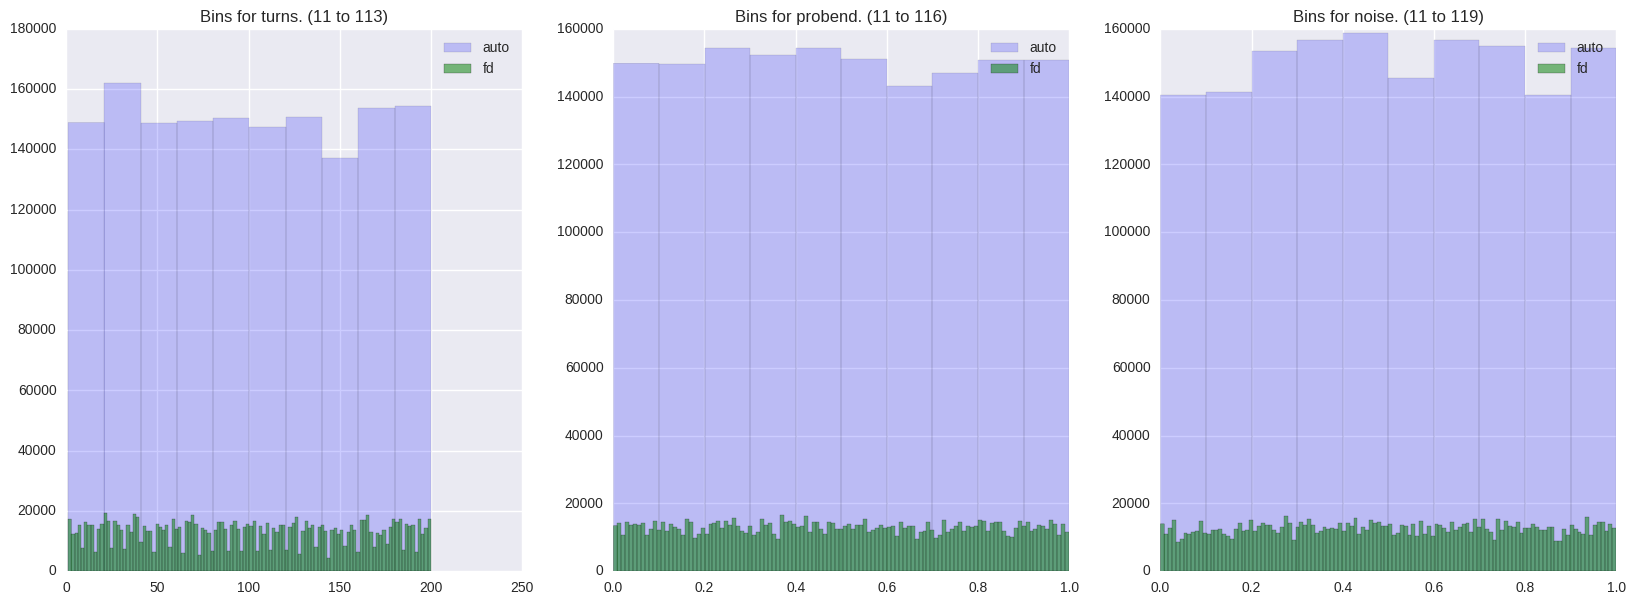

In [10]:
bins = {}
bins_auto = {}
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 7))
for i, col in enumerate(['turns', 'probend', 'noise']):
    dummy = df[df[col].notnull()]
    _, bins_1, _ = axes[i].hist(dummy[col], alpha=0.2, label='auto', color='blue')
    _, bins_2, _ = axes[i].hist(dummy[col], bins= 'fd',label='fd',alpha=0.5, color='green')#, color='black', histtype='step', linewidth=1)
    axes[i].legend(loc='upper right')
    axes[i].set_title('Bins for {}. ({} to {})'.format(col, len(bins_1), len(bins_2)))
    
    bins[col] = bins_2
    bins_auto[col] = bins_1

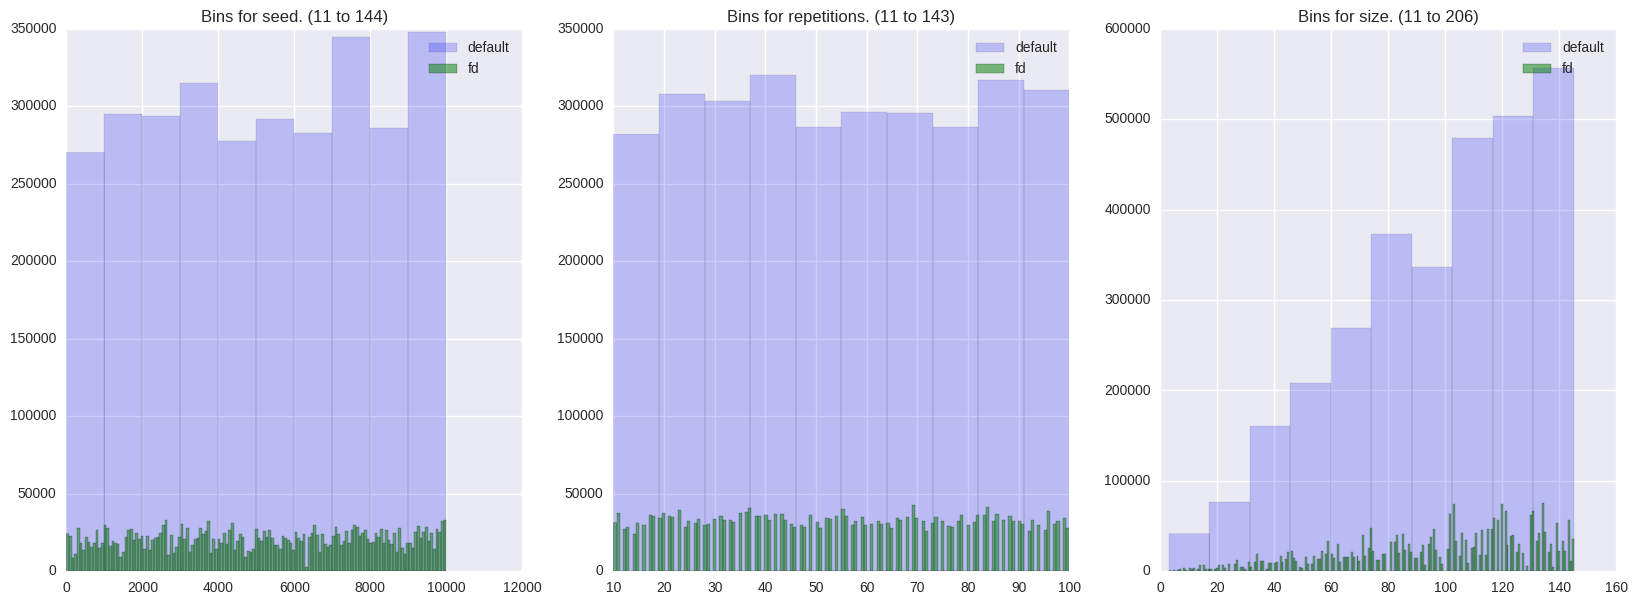

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 7))
for i, col in enumerate(['seed', 'repetitions', 'size']):
    dummy = df[df[col].notnull()]
    _, bins_1, _ = axes[i].hist(dummy[col], alpha=0.2, label='default', color='blue')
    _, bins_2, _ = axes[i].hist(dummy[col], bins= 'fd',label='fd',alpha=0.5, color='green')#, color='black', histtype='step', linewidth=1)
    axes[i].legend(loc='upper right')
    axes[i].set_title('Bins for {}. ({} to {})'.format(col, len(bins_1), len(bins_2)))
    
    bins[col] = bins_2
    bins_auto[col] = bins_1

**Question**: Should we reduce the number of bins?

Violin plots
------------

After getting the bins from above we will now create violin plots fro each bin.


**I am only ploting noise here. For the violin plots to give some information we need to play around with the number of bins.**

/home/nightwing/anaconda3/envs/axlml/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


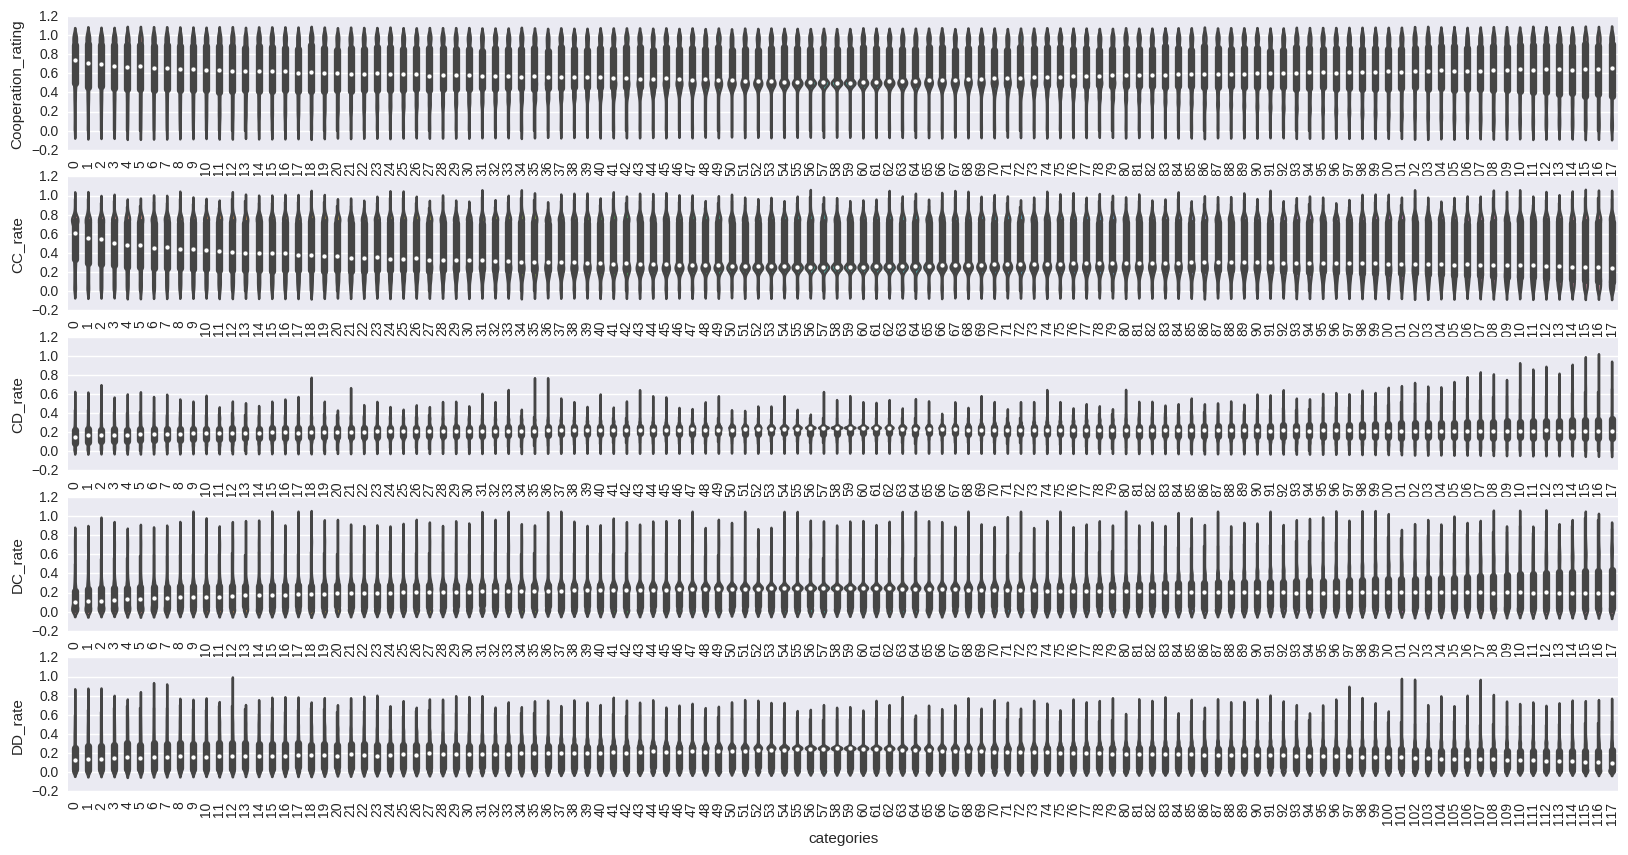

In [8]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(20, 10))
for i, col in enumerate(['noise']): # , 'probend', 'noise']):
    dummy = df[df[col].notnull()]
    categories = pd.cut(dummy[col], bins[col])
    dummy['categories'] = categories
    labels = [str(i) for i, _ in enumerate(bins[col][:-1])]
    
    ax = sns.violinplot(x="categories", y="Cooperation_rating", data=dummy, ax=axes[0]) 
    ax.set_xticklabels(labels, rotation=90)
    ax = sns.violinplot(x="categories", y="CC_rate", data=dummy, ax=axes[1])
    ax.set_xticklabels(labels, rotation=90)
    ax = sns.violinplot(x="categories", y="CD_rate", data=dummy, ax=axes[2])
    ax.set_xticklabels(labels, rotation=90)
    ax = sns.violinplot(x="categories", y="DC_rate", data=dummy, ax=axes[3])
    ax.set_xticklabels(labels, rotation=90)
    ax = sns.violinplot(x="categories", y="DD_rate", data=dummy, ax=axes[4])
    ax.set_xticklabels(labels, rotation=90)

/home/nightwing/anaconda3/envs/axlml/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


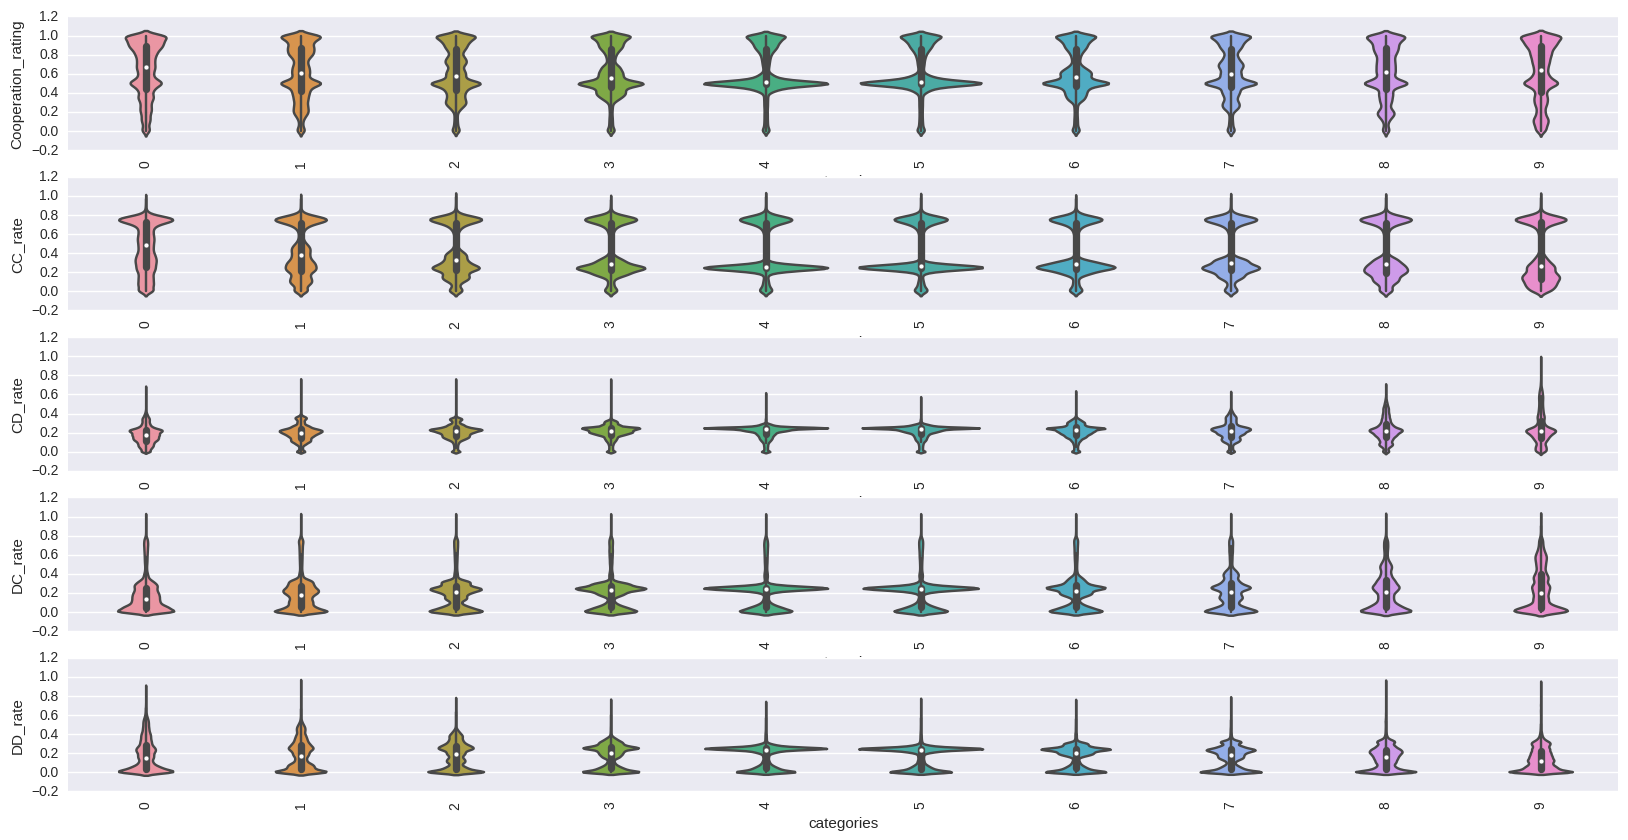

In [13]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(20, 10))
for i, col in enumerate(['noise']): # , 'probend', 'noise']):
    dummy = df[df[col].notnull()]
    categories = pd.cut(dummy[col], bins_auto[col])
    dummy['categories'] = categories
    labels = [str(i) for i, _ in enumerate(bins_auto[col][:-1])]
    
    ax = sns.violinplot(x="categories", y="Cooperation_rating", data=dummy, ax=axes[0]) 
    ax.set_xticklabels(labels, rotation=90)
    ax = sns.violinplot(x="categories", y="CC_rate", data=dummy, ax=axes[1])
    ax.set_xticklabels(labels, rotation=90)
    ax = sns.violinplot(x="categories", y="CD_rate", data=dummy, ax=axes[2])
    ax.set_xticklabels(labels, rotation=90)
    ax = sns.violinplot(x="categories", y="DC_rate", data=dummy, ax=axes[3])
    ax.set_xticklabels(labels, rotation=90)
    ax = sns.violinplot(x="categories", y="DD_rate", data=dummy, ax=axes[4])
    ax.set_xticklabels(labels, rotation=90)